In [1]:
import sys
sys.path.append('../code/')

In [2]:
%load_ext autoreload
%autoreload 2

from libs import io
from libs import constants
from libs import vis
from helpers import factuality

# Setup

In [26]:
FACTUALITY_PATH = '../results/factuality'
PLOTS_PATH = '../results/plots'

FIGSIPER_CROWDED=(4.6,6)
FIGSPIDER = (5,7)
YLIM = (-0.01,1)

In [4]:
vis.sns_reset()
vis.sns_paper_style()

## Data

In [5]:
df_authors = io.pd.concat([io.read_csv(io.path_join(FACTUALITY_PATH, f"{model}_author.csv"), index_col=0) for model in constants.LLMS], ignore_index=True)
df_authors['task_name'] = io.pd.Categorical(df_authors['task_name'], categories=constants.EXPERIMENT_TASKS, ordered=True)
df_authors.shape


(147622, 32)

# Factuality Author
Do they exist?

## Exists either in OA or APS

In [6]:
df_fact_authors_either = factuality.get_factuality_authors_either_OA_APS(df_authors)
df_fact_authors_either.head(2)

,model,task_name,mean,std
0,gemma2-9b,top_k,0.6,0.0
1,gemma2-9b,field,0.6,0.0


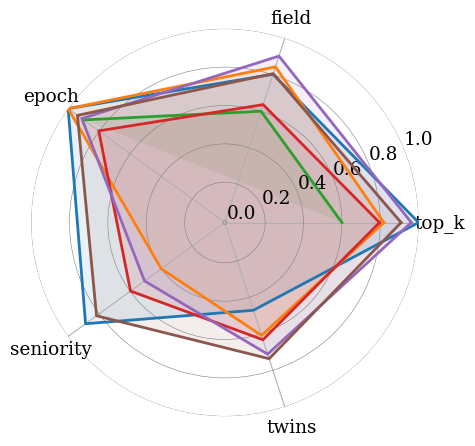

In [27]:
fn = io.path_join(PLOTS_PATH, 'factuality_author_mean_pct_real.pdf')
vis.plot_spiderweb(df_fact_authors_either, x_order=constants.EXPERIMENT_TASKS, x_col='task_name', y_col='mean', 
                   hue='model', hue_order=constants.LLMS, hue_colors=constants.LLMS_COLORS,
                   ylim=YLIM, legend=False,
                   figsize=FIGSPIDER)

## Only in one of them

In [28]:
df_fact_authors_both, df_fact_authors_oa, df_fact_authors_none = factuality.get_factuality_author_for_each_case(df_authors)
df_fact_authors_both.head(2)

,model,task_name,mean,std
0,gemma2-9b,top_k,0.6,0.0
1,gemma2-9b,field,0.6,0.0


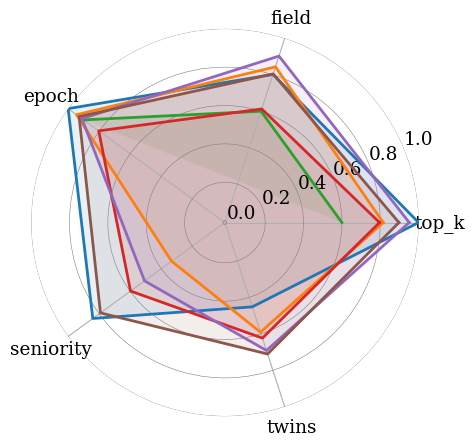

In [29]:
fn = None #io.path_join(PLOTS_PATH, 'factuality_author_mean_pct_both.pdf')
vis.plot_spiderweb(df_fact_authors_both, x_order=constants.EXPERIMENT_TASKS, x_col='task_name', y_col='mean',
                   hue='model', hue_order=constants.LLMS, hue_colors=constants.LLMS_COLORS,
                   ylim=YLIM, legend=False,
                   figsize=FIGSPIDER)

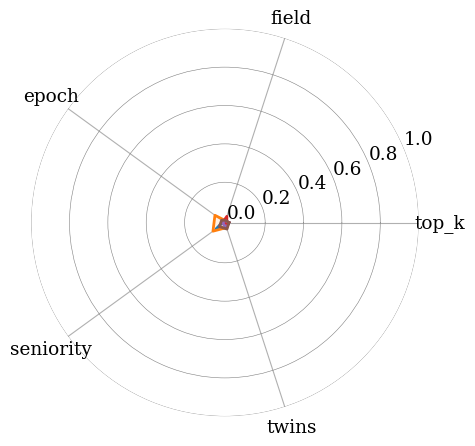

In [30]:

fn = None #io.path_join(PLOTS_PATH, 'factuality_author_mean_pct_both.pdf')
vis.plot_spiderweb(df_fact_authors_oa, x_order=constants.EXPERIMENT_TASKS, x_col='task_name', y_col='mean',
                   hue='model', hue_order=constants.LLMS, hue_colors=constants.LLMS_COLORS,
                   ylim=YLIM, legend=False,
                   figsize=FIGSPIDER)

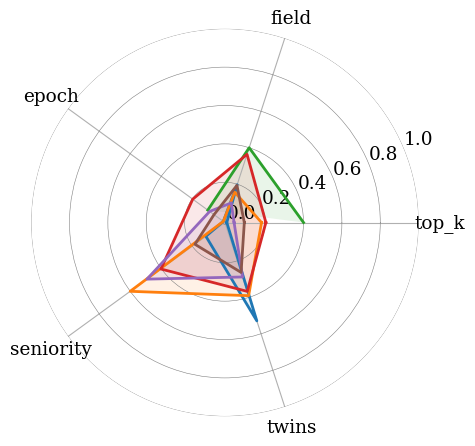

In [31]:

fn = None #io.path_join(PLOTS_PATH, 'factuality_author_mean_pct_both.pdf')
vis.plot_spiderweb(df_fact_authors_none, x_order=constants.EXPERIMENT_TASKS, x_col='task_name', y_col='mean',
                   hue='model', hue_order=constants.LLMS, hue_colors=constants.LLMS_COLORS,
                   ylim=YLIM,legend=False,
                   figsize=FIGSPIDER)

# Factuality Field

In [32]:
df_field = io.pd.concat([io.read_csv(io.path_join(FACTUALITY_PATH, f"{model}_{constants.EXPERIMENT_TASK_FIELD}.csv"), index_col=0) for model in constants.LLMS ], ignore_index=True)
df_field.shape

(16773, 20)

In [33]:
df_fact_field = factuality.get_factuality_field(df_field)
df_fact_field.head(2)

/code/espinl/LLMScholar-WWW24/Auditor/notebooks/helpers/factuality.py:61: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ True  True  True ...  True False False]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_fact_field.loc[:,'fact_doi_author'] = df_fact_field['fact_doi_author'].notnull()


,model,factuality_field,mean,std
0,gemma2-9b,All,0.0,0.000000
24,llama3-8b,All,0.001075,0.010341


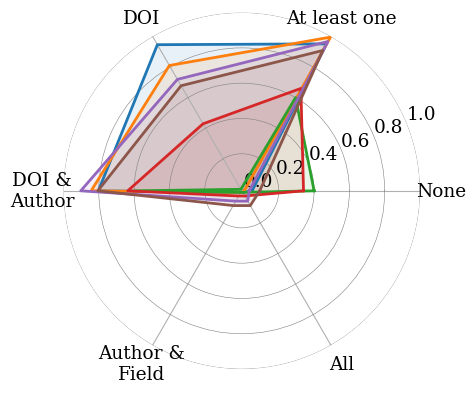

In [34]:
fn = io.path_join(PLOTS_PATH, 'factuality_field_mean_pct.pdf')
vis.plot_spiderweb(df_fact_field, x_col='factuality_field', x_order=constants.FACTUALITY_FIELD_FACT_CHECKS, y_col='mean',
                   hue='model', hue_order=constants.LLMS, hue_colors=constants.LLMS_COLORS,
                   ylim=YLIM, legend=False, fn=fn,
                   figsize=FIGSIPER_CROWDED) 

# Seniority

In [35]:
df_seniority = io.pd.concat([io.read_csv(io.path_join(FACTUALITY_PATH, f"{model}_{constants.EXPERIMENT_TASK_SENIORITY}.csv"), index_col=0) for model in constants.LLMS ], ignore_index=True)
df_seniority.shape

/tmp/ipykernel_1591916/4055560821.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_seniority = io.pd.concat([io.read_csv(io.path_join(FACTUALITY_PATH, f"{model}_{constants.EXPERIMENT_TASK_SENIORITY}.csv"), index_col=0) for model in constants.LLMS ], ignore_index=True)


(12072, 24)

In [36]:
df_fact_seniority = factuality.get_factuality_seniority(df_seniority)
df_fact_seniority.head(2)

,model,factuality_field,mean,std
24,mixtral-8x7b,None,0.451892,0.350945
19,llama3-8b,None,0.132223,0.121201


gemma2-9b (0, 4) single positional indexer is out-of-bounds


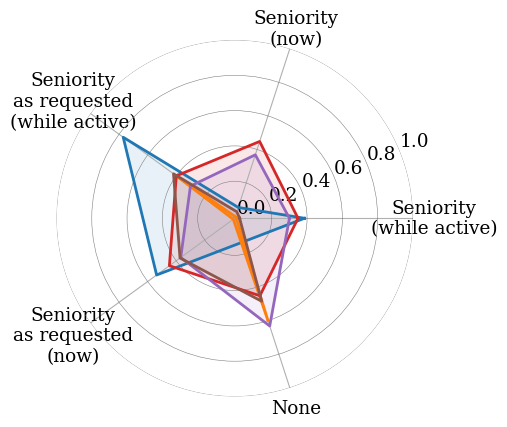

In [38]:
fn = io.path_join(PLOTS_PATH, 'factuality_seniority_mean_pct.pdf')
vis.plot_spiderweb(df_fact_seniority, x_col='factuality_field', x_order=constants.FACTUALITY_SENIORITY_FACT_CHECKS, y_col='mean',
                   hue='model', hue_order=constants.LLMS, hue_colors=constants.LLMS_COLORS,
                    ylim=YLIM,legend=False, fn=fn,
                   figsize=FIGSIPER_CROWDED)

# Epoch

In [39]:
df_epoch = io.pd.concat([io.read_csv(io.path_join(FACTUALITY_PATH, f"{model}_{constants.EXPERIMENT_TASK_EPOCH}.csv"), index_col=0) for model in constants.LLMS ], ignore_index=True)
df_epoch.shape

(14165, 21)

In [40]:
df_fact_epoch = factuality.get_factuality_epoch(df_epoch)
df_fact_epoch.head(2)

/code/espinl/LLMScholar-WWW24/Auditor/notebooks/helpers/factuality.py:151: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 0 ... 1 0 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_fact_epoch.loc[:,'fact_epoch_requested'] = df_fact_epoch.fact_epoch_requested.astype(int)
/code/espinl/LLMScholar-WWW24/Auditor/notebooks/helpers/factuality.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 0 ... 1 0 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_fact_epoch.loc[:,'fact_epoch_llm_in_gt'] = df_fact_epoch.fact_epoch_llm_in_gt.astype(int)
/code/espinl/LLMScholar-WWW24/Auditor/notebooks/helpers/factuality.py:153: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 1 0]' ha

,model,factuality_field,mean,std
23,llama3-8b,Epoch\nas requested,0.363636,0.0
3,gemma2-9b,Epoch\nas requested,0.700000,0.0


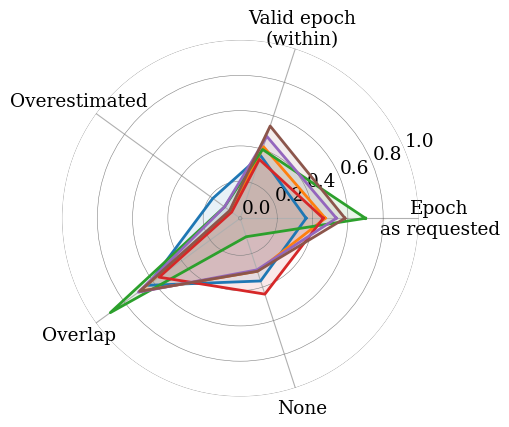

In [41]:
fn = io.path_join(PLOTS_PATH, 'factuality_epoch_mean_pct.pdf')
vis.plot_spiderweb(df_fact_epoch, x_col='factuality_field', x_order=constants.FACTUALITY_EPOCH_FACT_CHECKS, y_col='mean',
                   hue='model', hue_order=constants.LLMS, hue_colors=constants.LLMS_COLORS,
                   ylim=YLIM, legend=False, fn=fn,
                   figsize=FIGSIPER_CROWDED)